In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rdkit import Chem
import rdkit.Chem.Descriptors as dsc

In [31]:
scgas = pd.read_csv(r'..\datasets\scgas.csv')
print(scgas.info())
print(scgas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  3132 non-null   object 
 1   logvp   3132 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.1+ KB
None
             logvp
count  3132.000000
mean     -1.532371
std       3.085369
min     -10.450000
25%      -3.688685
50%      -0.700000
75%       0.790000
max       5.670000


In [3]:
df = pd.read_csv(r'..\datasets\features_all1_drop_zeros.csv')
df.head()

,row_index,smiles,logvp,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,...,use_USR_002,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011
0,0,COC(F)(F)C(F)(F)C(F)(F)F,2.75,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,...,-0.815118,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596
1,1,COC(F)(F)C(F)(F)F,3.21,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,...,-0.795611,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.14,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,...,0.855538,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.55,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,...,-0.536865,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.66,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,...,0.445334,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070


In [34]:
print(df.info(verbose=True))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 2647 columns):
 #     Column                        Dtype  
---    ------                        -----  
 0     row_index                     int64  
 1     smiles                        object 
 2     status                        object 
 3     jobdir                        object 
 4     etkdg_xyz                     object 
 5     xtbopt_xyz                    object 
 6     xtb_opt_log                   object 
 7     xtb_sp_log                    object 
 8     charges_file                  object 
 9     wbo_file                      object 
 10    molden_file                   object 
 11    xtb_available                 int64  
 12    xtb_total_energy              float64
 13    xtb_homo                      float64
 14    xtb_lumo                      float64
 15    xtb_gap                       float64
 16    xtb_charges_json              object 
 17    xtb_dq_bonds_json            

In [29]:
df.filter(regex = r'^use_')

,use_AUTOCORR3D_000,use_AUTOCORR3D_001,use_AUTOCORR3D_002,use_AUTOCORR3D_003,use_AUTOCORR3D_004,use_AUTOCORR3D_005,use_AUTOCORR3D_006,use_AUTOCORR3D_007,use_AUTOCORR3D_008,use_AUTOCORR3D_009,...,use_USR_002,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011
0,0.232,0.666,0.985,0.682,0.186,0.000,0.000,0.000,0.000,0.000,...,-0.815118,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596
1,0.307,0.826,1.019,0.321,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.795611,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647
2,0.189,0.453,0.646,0.580,0.549,0.627,0.566,0.404,0.179,0.071,...,0.855538,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487
3,0.205,0.475,0.643,0.610,0.662,0.670,0.434,0.122,0.000,0.000,...,-0.536865,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582
4,0.205,0.475,0.619,0.618,0.634,0.683,0.514,0.194,0.000,0.000,...,0.445334,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,0.161,0.312,0.372,0.455,0.526,0.681,0.547,0.562,0.563,0.670,...,0.445395,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967
3126,0.192,0.494,0.765,0.915,0.788,0.434,0.144,0.000,0.000,0.000,...,-0.663110,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416
3127,0.163,0.384,0.562,0.746,0.883,0.742,0.418,0.112,0.000,0.000,...,-0.647139,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646
3128,0.169,0.410,0.592,0.742,0.898,0.789,0.403,0.077,0.000,0.000,...,-0.848593,2.849331,1.128287,-0.887418,4.838988,2.286404,-0.836556,4.270345,2.088937,-0.653688


In [36]:
dsc.NHOHCount

<function rdkit.Chem.Lipinski.<lambda>(x)>

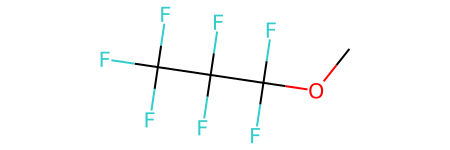

In [52]:
smiles = scgas['smiles'][0]
mol = Chem.MolFromSmiles(smiles)
mol


In [41]:
scgas['smiles'][0]

'COC(F)(F)C(F)(F)C(F)(F)F'

In [59]:
from rdkit.Chem import AllChem, Descriptors3D, rdMolDescriptors

smiles = scgas['smiles'][0]
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))

AllChem.EmbedMolecule(mol, AllChem.ETKDGv3())
AllChem.UFFOptimizeMolecule(mol)

# usr = Descriptors3D.USR(mol)
# usrcat = Descriptors3D.USRCAT(mol)
# morse = Descriptors3D.MORSE(mol)
# getaway = Descriptors3D.GETAWAY(mol)
autocorr = rdMolDescriptors.CalcAUTOCORR3D(mol)
autocorr

[0.18,
 0.536,
 0.701,
 0.746,
 0.548,
 0.44,
 0.0,
 0.0,
 0.0,
 0.0,
 0.214,
 0.769,
 1.257,
 0.978,
 0.26,
 0.059,
 0.0,
 0.0,
 0.0,
 0.0,
 0.117,
 0.275,
 0.36,
 0.297,
 0.17,
 0.075,
 0.0,
 0.0,
 0.0,
 0.0,
 0.229,
 0.806,
 1.178,
 1.186,
 0.704,
 0.603,
 0.0,
 0.0,
 0.0,
 0.0,
 0.083,
 0.157,
 0.183,
 0.172,
 0.128,
 0.053,
 0.0,
 0.0,
 0.0,
 0.0,
 0.243,
 0.891,
 1.292,
 1.371,
 0.891,
 0.822,
 0.0,
 0.0,
 0.0,
 0.0,
 1.186,
 10.585,
 22.795,
 20.154,
 4.536,
 3.52,
 0.0,
 0.0,
 0.0,
 0.0,
 0.135,
 0.338,
 0.451,
 0.398,
 0.241,
 0.135,
 0.0,
 0.0,
 0.0,
 0.0]

In [65]:
df[['delta_AUTOCORR3D_000', 'etkdg_AUTOCORR3D_000']]

,delta_AUTOCORR3D_000,etkdg_AUTOCORR3D_000
0,-0.005,0.237
1,-0.007,0.314
2,-0.002,0.191
3,-0.002,0.207
4,-0.002,0.207
...,...,...
3125,-0.001,0.162
3126,-0.001,0.193
3127,-0.002,0.165
3128,-0.001,0.170


In [ ]:
def build_feat_map(df3d, smiles_col='smiles', faeture_cols=None, fillna_value=0.0):
    if feature_cols is None:
        feature_cols = [c for c in df3d.columns if c!= smiles_col]
    
    df = df3d[[smiles_col] + feature_cols].copy()
    df = df.drop_duplicates(smiles_col)
    df[feature_cols] = df[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(fillna_value)

    # smiles -> np.array(D3, )
    feat_map = dict(zip(
        df[smiles_col].values,
        df[feature_cols].values.astype(np.float32)
    ))

    return feat_map, feature_cols

In [70]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import dgl

# -----------------------------
# 1) collate 함수 (디버깅 대상)
# -----------------------------
def collate_fusion_scgas(samples, feat3d_map, feat3d_dim, device="cpu"):
    """
    samples: [(graph, label, smiles), ...]
    return: batched_graph, x2d(B,2), x3d(B,D3), y(B, ydim)
    """
    graphs, labels, smiles_list = map(list, zip(*samples))
    bg = dgl.batch(graphs)

    # ---- 2D descriptor (예: 2개) ----
    x2d = np.empty((len(samples), 2), dtype=np.float32)
    for i, g in enumerate(graphs):
        x2d[i, 0] = float(g.NHOHCount)
        x2d[i, 1] = float(g.SlogP_VSA2)

    # ---- 3D descriptor lookup ----
    x3d = np.empty((len(samples), feat3d_dim), dtype=np.float32)
    for i, smi in enumerate(smiles_list):
        v = feat3d_map.get(smi, None)
        if v is None:
            x3d[i] = 0.0
        else:
            x3d[i] = v

    # ---- labels: list of np.ndarray -> 단일 np.ndarray로 변환(경고 방지) ----
    y = np.asarray(labels, dtype=np.float32)

    return (
        bg,
        torch.from_numpy(x2d).to(device),
        torch.from_numpy(x3d).to(device),
        torch.from_numpy(y).to(device),
    )


# ----------------------------------------
# 2) 예시 데이터 생성 (그래프 + 라벨 + smiles)
# ----------------------------------------
def make_dummy_graph(num_nodes=5):
    # 간단히 chain 그래프 생성: 0-1-2-...-(n-1)
    src = list(range(num_nodes - 1))
    dst = list(range(1, num_nodes))
    g = dgl.graph((src + dst, dst + src))  # 무방향처럼 만들기 위해 양방향 추가
    return g

# 더미 smiles 6개
smiles_list = [f"SMI_{i}" for i in range(6)]

# D3 설정 (3D descriptor 차원)
D3 = 8

# smiles -> 3D feature vector
feat3d_map = {smi: np.random.randn(D3).astype(np.float32) for smi in smiles_list}

# samples 구성: (graph, label, smiles)
# label은 예시로 ydim=2 (회귀 2개 타겟)처럼 만들어봄
samples = []
for i, smi in enumerate(smiles_list):
    g = make_dummy_graph(num_nodes=4 + (i % 3))  # 노드 수 조금씩 다르게
    # 2D descriptor처럼 속성 부착
    g.NHOHCount = np.random.randint(0, 6)        # int도 OK (collate에서 float로 변환)
    g.SlogP_VSA2 = np.random.rand() * 10.0

    y = np.random.randn(1).astype(np.float32)    # (2,)
    samples.append((g, y, smi))


# ----------------------------------------
# 3) DataLoader + lambda collate_fn로 실행
# ----------------------------------------
collate_fn = lambda batch: collate_fusion_scgas(batch, feat3d_map, D3, device="cpu")

loader = DataLoader(samples, batch_size=3, shuffle=False, collate_fn=collate_fn)

for step, batch in enumerate(loader):
    bg, x2d, x3d, y = batch
    print(f"\n[step {step}]")
    print("  bg:", bg)                           # batched DGLGraph
    print("  x2d shape:", x2d.shape)             # (B, 2)
    print("  x3d shape:", x3d.shape)             # (B, D3)
    print("  y shape:", y.shape)                 # (B, 2)
    print("  x2d[0]:", x2d[0])
    print("  x3d[0,:3]:", x3d[0, :3])
    print("  y[0]:", y)



[step 0]
  bg: Graph(num_nodes=15, num_edges=24,
      ndata_schemes={}
      edata_schemes={})
  x2d shape: torch.Size([3, 2])
  x3d shape: torch.Size([3, 8])
  y shape: torch.Size([3, 1])
  x2d[0]: tensor([5.0000, 1.3084])
  x3d[0,:3]: tensor([-0.4828,  0.8270,  0.0392])
  y[0]: tensor([[-1.8252],
        [-0.6622],
        [-0.5946]])

[step 1]
  bg: Graph(num_nodes=15, num_edges=24,
      ndata_schemes={}
      edata_schemes={})
  x2d shape: torch.Size([3, 2])
  x3d shape: torch.Size([3, 8])
  y shape: torch.Size([3, 1])
  x2d[0]: tensor([1.0000, 3.9217])
  x3d[0,:3]: tensor([ 0.6136,  0.7550, -1.5373])
  y[0]: tensor([[-0.1961],
        [-1.3357],
        [-1.5907]])


In [72]:
from functools import partial

collate_fn = partial(
    collate_fusion_scgas,
    feat3d_map=feat3d_map,
    D3=D3,
    device="cpu"
)
collate_fn

functools.partial(<function collate_fusion_scgas at 0x000002728DE125E0>, feat3d_map={'SMI_0': array([-0.48278603,  0.82703835,  0.03924772, -0.9174626 ,  1.0163012 ,
       -0.60359097,  0.8088497 , -0.5790549 ], dtype=float32), 'SMI_1': array([-2.1921375 , -0.1526398 ,  1.4893744 ,  0.09031926,  1.1364211 ,
       -0.67914   , -1.1255605 ,  0.59245986], dtype=float32), 'SMI_2': array([-0.48046008,  2.180202  ,  2.0239244 , -0.948986  , -0.7414798 ,
       -1.4500873 , -0.45401743,  0.7463896 ], dtype=float32), 'SMI_3': array([ 0.6135758,  0.7549664, -1.5373194, -0.8800306, -1.1180774,
       -0.5490408, -1.1425678,  2.4642477], dtype=float32), 'SMI_4': array([ 1.125152  , -0.04401284,  0.34105718,  0.0928965 ,  1.3366498 ,
       -2.6841576 , -0.79178226,  1.8250513 ], dtype=float32), 'SMI_5': array([-0.8005764 ,  0.24924497, -0.31145704,  0.4184474 , -0.3449239 ,
        0.3176832 , -1.4913238 , -1.467536  ], dtype=float32)}, D3=8, device='cpu')

In [76]:
df.columns
feature_cols = [c for c in df.columns if c != 'smiles']
feature_cols

['row_index',
 'status',
 'jobdir',
 'etkdg_xyz',
 'xtbopt_xyz',
 'xtb_opt_log',
 'xtb_sp_log',
 'charges_file',
 'wbo_file',
 'molden_file',
 'xtb_available',
 'xtb_total_energy',
 'xtb_homo',
 'xtb_lumo',
 'xtb_gap',
 'xtb_charges_json',
 'xtb_dq_bonds_json',
 'xtb_wbo_bonds_json',
 'q_mean',
 'q_std',
 'q_min',
 'q_max',
 'dq_mean',
 'dq_std',
 'dq_min',
 'dq_max',
 'wbo_mean',
 'wbo_std',
 'wbo_min',
 'wbo_max',
 'error',
 'etkdg_embed_seed',
 'etkdg_embed_useRandomCoords',
 'etkdg_embed_enforceChirality',
 'etkdg_embed_mode',
 'etkdg_AUTOCORR3D_000',
 'etkdg_AUTOCORR3D_001',
 'etkdg_AUTOCORR3D_002',
 'etkdg_AUTOCORR3D_003',
 'etkdg_AUTOCORR3D_004',
 'etkdg_AUTOCORR3D_005',
 'etkdg_AUTOCORR3D_006',
 'etkdg_AUTOCORR3D_007',
 'etkdg_AUTOCORR3D_008',
 'etkdg_AUTOCORR3D_009',
 'etkdg_AUTOCORR3D_010',
 'etkdg_AUTOCORR3D_011',
 'etkdg_AUTOCORR3D_012',
 'etkdg_AUTOCORR3D_013',
 'etkdg_AUTOCORR3D_014',
 'etkdg_AUTOCORR3D_015',
 'etkdg_AUTOCORR3D_016',
 'etkdg_AUTOCORR3D_017',
 'etkdg_AUTOC

In [80]:
df = pd.read_csv(r'..\datasets\features_all1_drop_zeros_sample.csv')
df.head()
df.shape

(3130, 4)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   smiles              3130 non-null   object 
 1   use_AUTOCORR3D_071  3122 non-null   float64
 2   use_AUTOCORR3D_072  3122 non-null   float64
 3   use_AUTOCORR3D_073  3122 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.9+ KB


In [93]:
def build_feat_map(df3d):
    smiles_col = 'smiles'
    fillna_value=0.0
    
    feature_cols = [c for c in df3d.columns if c != smiles_col]

    df = df3d[[smiles_col] + feature_cols].copy()
    df[feature_cols] = df[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(fillna_value)
    print('df', df)

    # smiles -> np.array(D3,)
    feat_map = dict(zip(
        df[smiles_col].values,
        df[feature_cols].values.astype(np.float32)
    ))
    return feat_map, feature_cols

a = build_feat_map(df)
a

df                                           smiles  use_AUTOCORR3D_071  \
0                       COC(F)(F)C(F)(F)C(F)(F)F               0.486   
1                              COC(F)(F)C(F)(F)F               0.587   
2            Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br               0.553   
3                    Clc1c(Oc2ccccc2)c(Cl)ccc1Cl               0.511   
4                  Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1               0.510   
...                                          ...                 ...   
3125                 CC(C)CCCC(C)CCCC(C)CCCC(C)C               0.312   
3126       O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2               0.490   
3127     OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1               0.379   
3128    C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2               0.410   
3129  CC(C)=CC1C(C(=O)OCC2=C(C)C=C(C)C=C2)C1(C)C               0.348   

      use_AUTOCORR3D_072  use_AUTOCORR3D_073  
0                  0.662               0.443  
1                  0.668              

({'COC(F)(F)C(F)(F)C(F)(F)F': array([0.486, 0.662, 0.443], dtype=float32),
  'COC(F)(F)C(F)(F)F': array([0.587, 0.668, 0.241], dtype=float32),
  'Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br': array([0.553, 0.87 , 0.808], dtype=float32),
  'Clc1c(Oc2ccccc2)c(Cl)ccc1Cl': array([0.511, 0.724, 0.702], dtype=float32),
  'Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1': array([0.51 , 0.696, 0.705], dtype=float32),
  'CC(C)C(C(=O)OC(C#N)c1cccc(c1)Oc1ccc(Br)cc1)c1ccc(cc1)OC(F)F': array([0.206, 0.294, 0.371], dtype=float32),
  'Clc1ccc(cc1)Oc1c(Cl)cccc1Cl': array([0.51 , 0.677, 0.652], dtype=float32),
  'Clc1ccc(cc1)Oc1cccc(Cl)c1Cl': array([0.511, 0.696, 0.576], dtype=float32),
  'Clc1cc(Cl)c(cc1)Oc1cc(Cl)ccc1': array([0.51 , 0.649, 0.656], dtype=float32),
  'Clc1cc2c(c(Cl)c1Cl)c(Cl)ccc2Cl': array([0.669, 1.11 , 1.188], dtype=float32),
  'COc1ccc(cc1NNC(=O)OC(C)C)-c1ccccc1': array([0.298, 0.407, 0.508], dtype=float32),
  'CC(C)N(C(=O)COc1[n][n]c([s]1)C(F)(F)F)c1ccc(F)cc1': array([0.293, 0.381, 0.451], dtype=float32),
 

In [4]:
df

,row_index,smiles,logvp,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,...,use_USR_002,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011
0,0,COC(F)(F)C(F)(F)C(F)(F)F,2.750000,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,...,-0.815118,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596
1,1,COC(F)(F)C(F)(F)F,3.210000,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,...,-0.795611,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.140000,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,...,0.855538,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.550000,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,...,-0.536865,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.660000,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,...,0.445334,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,-2.356547,OK,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,...,0.445395,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,-6.657577,OK,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,...,-0.663110,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,-7.522879,OK,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_sp.log,C:\temp_xtb_jobs1\003129_7cb25642dc\charges,...,-0.647139,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646
3128,3130,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,-7.045757,OK,C:\temp_xtb_jobs1\003130_9f7089451c,C:\temp_xtb_jobs1\003130_9f7089451c\etkdg.xyz,C:\temp_xtb_jobs1\003130_9f7089451c\xtbopt.xyz,C:\temp_xtb_jobs1\003130_9f7089451c\xtb_opt.log,C:\temp_xtb_jobs1\003130_9f7089451c\xtb_sp.log,C:\temp_xtb_jobs1\003130_9f7089451c\charges,...,-0.848593,2.849331,1.128287,-0.887418,4.83

In [7]:
def selected_descriptors_scgas():
    desc_list = ['use_GETAWAY_003', 'use_GETAWAY_063', 'use_MORSE_129', 'use_USRCAT_057',
       'use_GETAWAY_002', 'use_GETAWAY_165', 'use_MORSE_145',
       'use_AUTOCORR3D_020', 'use_MORSE_163', 'use_USRCAT_054',
       'use_MORSE_223', 'use_MORSE_194', 'use_AUTOCORR3D_010', 'use_MORSE_130',
       'use_USRCAT_033', 'use_GETAWAY_047', 'use_GETAWAY_142',
       'use_Eccentricity', 'use_USRCAT_058', 'use_USRCAT_055',
       'use_GETAWAY_093', 'use_MORSE_058', 'use_MORSE_203', 'use_PMI3',
       'use_GETAWAY_055', 'use_USRCAT_025', 'use_MORSE_105', 'use_NPR2',
       'use_MORSE_207', 'use_GETAWAY_137', 'use_GETAWAY_028',
       'use_AUTOCORR3D_013', 'use_GETAWAY_086', 'use_MORSE_190',
       'use_GETAWAY_177', 'use_MORSE_143', 'use_GETAWAY_145', 'use_MORSE_183',
       'use_MORSE_148']
    
    return desc_list


In [9]:
selected_descriptors_scgas()

['use_GETAWAY_003',
 'use_GETAWAY_063',
 'use_MORSE_129',
 'use_USRCAT_057',
 'use_GETAWAY_002',
 'use_GETAWAY_165',
 'use_MORSE_145',
 'use_AUTOCORR3D_020',
 'use_MORSE_163',
 'use_USRCAT_054',
 'use_MORSE_223',
 'use_MORSE_194',
 'use_AUTOCORR3D_010',
 'use_MORSE_130',
 'use_USRCAT_033',
 'use_GETAWAY_047',
 'use_GETAWAY_142',
 'use_Eccentricity',
 'use_USRCAT_058',
 'use_USRCAT_055',
 'use_GETAWAY_093',
 'use_MORSE_058',
 'use_MORSE_203',
 'use_PMI3',
 'use_GETAWAY_055',
 'use_USRCAT_025',
 'use_MORSE_105',
 'use_NPR2',
 'use_MORSE_207',
 'use_GETAWAY_137',
 'use_GETAWAY_028',
 'use_AUTOCORR3D_013',
 'use_GETAWAY_086',
 'use_MORSE_190',
 'use_GETAWAY_177',
 'use_MORSE_143',
 'use_GETAWAY_145',
 'use_MORSE_183',
 'use_MORSE_148']

In [10]:
df[selected_descriptors_scgas()]

,use_GETAWAY_003,use_GETAWAY_063,use_MORSE_129,use_USRCAT_057,use_GETAWAY_002,use_GETAWAY_165,use_MORSE_145,use_AUTOCORR3D_020,use_MORSE_163,use_USRCAT_054,...,use_GETAWAY_137,use_GETAWAY_028,use_AUTOCORR3D_013,use_GETAWAY_086,use_MORSE_190,use_GETAWAY_177,use_MORSE_143,use_GETAWAY_145,use_MORSE_183,use_MORSE_148
0,20.757,4.740,4.913,0.000000,3.389,1.677,0.020,0.169,1.095,0.000000,...,70.737,0.696,1.457,0.118,0.261,0.321,-0.020,0.957,-0.700,0.060
1,25.902,4.695,3.476,0.000000,2.938,1.392,-0.030,0.219,0.163,0.000000,...,85.526,0.120,0.508,0.024,0.384,0.220,-0.002,0.973,-0.288,0.033
2,13.699,11.545,7.866,0.000000,3.914,3.755,-0.493,0.201,-0.416,0.000000,...,7.514,4.696,5.159,1.951,-0.162,2.556,-0.557,0.713,0.159,0.236
3,14.961,9.340,9.709,0.000000,3.739,2.304,-0.696,0.202,-0.251,0.000000,...,9.056,0.072,1.436,1.174,-0.076,0.484,0.135,0.772,0.014,-0.229
4,15.040,9.327,10.890,0.000000,3.722,2.329,-0.691,0.202,-0.350,0.000000,...,7.598,0.074,1.501,1.233,-0.052,0.639,0.226,0.758,0.043,-0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,12.163,9.000,11.497,0.000000,3.934,1.409,0.329,0.161,-1.083,0.000000,...,0.357,0.315,0.455,1.350,0.381,0.054,-0.255,0.565,-0.036,-0.093
3126,8.693,3.785,13.503,0.000000,3.912,1.422,-0.940,0.190,0.275,0.000000,...,3.688,0.274,0.962,1.322,-0.368,0.058,-0.190,0.529,0.105,-0.542
3127,11.880,8.525,10.866,4.137817,4.072,1.991,-0.752,0.161,0.572,4.861889,...,3.652,0.302,0.792,1.459,0.013,0.077,0.130,0.747,-0.068,-0.185
3128,8.116,9.000,13.816,0.000000,3.863,2.021,-1.158,0.169,-0.126,0.000000,...,5.319,0.048,0.742,1.461,-0.464,0.042,-0.292,0.674,0.012,-0.452
